# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가을 위한 대용량 데이터셋을 제공(feeding)하기 위한 모듈
    - raw dataset 에서 입력을 위한 전처리, 제공을 위한 배치, shuffling등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태에 따라 다양한 방식을 제공


## 데이터셋 API 사용
1. <span style='font-size:1.2em;font-weight:bolder'>Dataset 생성</span>
    - raw dataset을 지정
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - from_tensor_slices(): 리스트 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.
2. <span style='font-size:1.2em;font-weight:bolder'>제공 데이터 전처리</span>
    - map(함수) : 하나 하나의 데이터를 변환
        - 함수: 값을 변환할 함수로 입력데이터셋의 개수만큼 매개변수 선언
    - filter(함수): 특정 조건의 데이터만 제공하도록 처리.
        - - 함수: 제공할 값의 조건을 정의한 함수로 입력데이터셋의 개수만큼 매개변수 선언하고 bool 값을 반환.
3. <span style='font-size:1.2em;font-weight:bolder'>Dataset을 사용해 데이터 제공</span>
    - batch(), shuffle()을 이용해 제공 방식 지정
        - batch(size): 학습/평가시 한번에 제공할 batch size 지정
            - size: int. batch size 지정
            - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    -  shuffle(buffer 크기): dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
    - repeat(count): 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다.
        
### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.


In [46]:
import tensorflow as tf
import numpy as np

In [47]:
new_data = np.arange(10)
new_data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
dataset = tf.data.Dataset.from_tensor_slices(new_data)
print(type(dataset))

<class 'tensorflow.python.data.ops.dataset_ops.TensorSliceDataset'>


In [49]:
#datast 으로 부터 값 조회
#take() 함수 사용 (원하는 갯수만큼만 가능 ) / or / 반복문 (dataset>>Iterable타입) - 전체 조회

for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [50]:
new_data2 = np.arange(10,20)
new_data2

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [51]:
dataset2 = tf.data.Dataset.from_tensor_slices((new_data, new_data2)) #데이터 셋 두개를 튜플로 묶음

for data in dataset2:
    print(type(data))
    print(data)
    break

<class 'tuple'>
(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)


In [52]:
#학습 - model.fit(X, y)
#raw_data : X_train, new_data2 : y_train
for X, y in dataset2:
    print(X, y)

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32) tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32) tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) tf.Tensor(19, shape=(), dtype=int32)


In [53]:
#datset.take(갯수) : 지정한 갯수만큼 조회
dataset3 = dataset.take(3) #dataset으로부터 3개
print(type(dataset3))

for data in dataset3:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.TakeDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [54]:
# datset.shuffle(buffer_size:정수) : dataset의 원소들을 섞어준다
dataset4 = dataset.shuffle(10)
print(type(dataset4))

for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.ShuffleDataset'>
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [55]:
#dataset.batch(batch_size) : 한번에 제공하는 데이터의 개수
dataset5 = dataset.batch(3)
print(type(dataset5))

for data in dataset5:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)
tf.Tensor([9], shape=(1,), dtype=int32)


In [56]:
# 기본 dataset + shuffle + batch
a = dataset.shuffle(10)
b = a.batch(3)
for data in b:
    print(data)

print('-'*50)
dataset6 = dataset.shuffle(10).batch(3)
for data in dataset6:
    print(data)

tf.Tensor([7 9 2], shape=(3,), dtype=int32)
tf.Tensor([3 5 0], shape=(3,), dtype=int32)
tf.Tensor([1 6 8], shape=(3,), dtype=int32)
tf.Tensor([4], shape=(1,), dtype=int32)
--------------------------------------------------
tf.Tensor([2 1 5], shape=(3,), dtype=int32)
tf.Tensor([4 9 3], shape=(3,), dtype=int32)
tf.Tensor([6 0 7], shape=(3,), dtype=int32)
tf.Tensor([8], shape=(1,), dtype=int32)


In [57]:
# dataset.repeat(count) : 전체 데이터셋을 count만큼 반복해서 제공, count생략시 무한 제공
dataset7 = dataset.repeat(2)

print(type(dataset7))

for data in dataset7:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [58]:
dataset8 = dataset.shuffle(10).batch(5).repeat(3)

for data in dataset8:
    print(data)

tf.Tensor([6 0 3 1 4], shape=(5,), dtype=int32)
tf.Tensor([2 5 8 7 9], shape=(5,), dtype=int32)
tf.Tensor([5 3 9 7 1], shape=(5,), dtype=int32)
tf.Tensor([8 2 0 6 4], shape=(5,), dtype=int32)
tf.Tensor([8 4 3 6 2], shape=(5,), dtype=int32)
tf.Tensor([7 5 9 0 1], shape=(5,), dtype=int32)


In [59]:
#dataset.map(함수) : 원소들의 값을 변환해서 제공, 함수 : 어떻게 변환할지 
#- 매개변수 : dataset이 제공하는 값을 받는 변수, 반환값 : dataset이 제공하는 값

def mapping(x):
    return x**2

dataset9 = dataset.map(mapping)
print(type(dataset9))
for data in dataset9:
    print(data)

<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32)


In [60]:
new_data, new_data2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))

In [61]:
dataset2 = tf.data.Dataset.from_tensor_slices((new_data, new_data2))
dataset2

<TensorSliceDataset shapes: ((), ()), types: (tf.int32, tf.int32)>

In [62]:
for data in dataset2:
    print(data)
    
# dataset2는 두개가 들어있으니까 맵핑함수도 두개의 변수를 받아야 한다
def mapping_func(x, y):
    return x**3, y**2


(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)
(<tf.Tensor: shape=(), dtype=int32, numpy=4>, <tf.Tensor: shape=(), dtype=int32, numpy=14>)
(<tf.Tensor: shape=(), dtype=int32, numpy=5>, <tf.Tensor: shape=(), dtype=int32, numpy=15>)
(<tf.Tensor: shape=(), dtype=int32, numpy=6>, <tf.Tensor: shape=(), dtype=int32, numpy=16>)
(<tf.Tensor: shape=(), dtype=int32, numpy=7>, <tf.Tensor: shape=(), dtype=int32, numpy=17>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=18>)
(<tf.Tensor: shape=(), dtype=int32, numpy=9>, <tf.Tensor: shape=(), dtype=int32, numpy=19>)


In [63]:
dataset10 = dataset2.map(mapping_func)

for data in dataset10:
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=100>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=121>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=144>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=169>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=196>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=225>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=256>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=289>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=324>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=361>)


In [64]:
#람다표현식으로 해보기
dataset12 = dataset2.map(lambda x, y : (x**3, y**2))
for data in dataset12:
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=100>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=121>)
(<tf.Tensor: shape=(), dtype=int32, numpy=8>, <tf.Tensor: shape=(), dtype=int32, numpy=144>)
(<tf.Tensor: shape=(), dtype=int32, numpy=27>, <tf.Tensor: shape=(), dtype=int32, numpy=169>)
(<tf.Tensor: shape=(), dtype=int32, numpy=64>, <tf.Tensor: shape=(), dtype=int32, numpy=196>)
(<tf.Tensor: shape=(), dtype=int32, numpy=125>, <tf.Tensor: shape=(), dtype=int32, numpy=225>)
(<tf.Tensor: shape=(), dtype=int32, numpy=216>, <tf.Tensor: shape=(), dtype=int32, numpy=256>)
(<tf.Tensor: shape=(), dtype=int32, numpy=343>, <tf.Tensor: shape=(), dtype=int32, numpy=289>)
(<tf.Tensor: shape=(), dtype=int32, numpy=512>, <tf.Tensor: shape=(), dtype=int32, numpy=324>)
(<tf.Tensor: shape=(), dtype=int32, numpy=729>, <tf.Tensor: shape=(), dtype=int32, numpy=361>)


In [65]:
dataset14 = dataset.filter(lambda x : x > 5)
for data in dataset14:
    print(data)

tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [66]:
raw_data = np.arange(-10,11)
dataset_final = tf.data.Dataset.from_tensor_slices(raw_data).filter(lambda x : x>0).map(lambda y:y+10).shuffle(raw_data.size).batch(4).repeat(2)


In [67]:
for data in dataset_final:
    print(data)

tf.Tensor([14 13 18 15], shape=(4,), dtype=int32)
tf.Tensor([17 11 20 16], shape=(4,), dtype=int32)
tf.Tensor([19 12], shape=(2,), dtype=int32)
tf.Tensor([15 20 12 19], shape=(4,), dtype=int32)
tf.Tensor([17 11 16 14], shape=(4,), dtype=int32)
tf.Tensor([18 13], shape=(2,), dtype=int32)


# 1. 회귀 - Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율

예측해야하는 것
- MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [68]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models 
    #layers : Deeplearning 모델의 layer를 정의하는 클래스들을 가진 모듈

In [69]:
# 랜덤값들의 씨드값 지정
np.random.seed(0)
tf.random.set_seed(0)

In [70]:
# 데이터 로딩
(train_X, train_y), (test_X, test_y) = keras.datasets.boston_housing.load_data()
print(train_X.shape, test_X.shape)
print(train_y.shape, test_y.shape)

(404, 13) (102, 13)
(404,) (102,)


In [71]:
train_y[:3]

array([15.2, 42.3, 50. ])

#### 하이퍼 파라미터, 변수 정의

In [72]:
# 하이퍼 파라미터
LEARNING_RATE = 0.001   #학습률
N_EPOCHS = 200    #epoch수
N_BATCHS = 32     #배치 사이즈

# 변수 지정
N_TRAIN = train_X.shape[0]  #train 데이터셋의 데이터 수
N_TEST = test_X.shape[0]    #test 데이터셋의 데이터 수

#### X, y 전처리 및 dataset 생성

In [73]:
# X 전처리 - scaling / y : 전처리 안해도 됨
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)


In [74]:
X_train.shape

(404, 13)

In [77]:
# dataset 구현
# drop_remainder=True : 마지막 배치 원소의 수가 설정해둔 배치사이즈보다 작으면 제공받지 않겠다
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, train_y)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, test_y)).batch(N_BATCHS)

#### 모델 구현

In [78]:
# 모델(네트워크)를 정의하는 함수
def create_housing_model():
    #모델 생성
    model = keras.Sequential()
        #model = keras.models.Sequential() : 예전 코드(이것으로 해도 상관 없다)
    
    #모델에 layer추가 (X_train의 shape중 뒤의 숫자가 입력층의 형식)
    #model.add(layers.InputLayer((13,))) #1차원이므로 굳이 flatten을 할 필요x
    #model.add(layers.Dense(units=32, activation='relu'))
    
    # 8,9의 code를 한방에 처리도 가능
    model.add(layers.Dense(units=32, activation='relu', input_shape=(13,))) #첫번째 hidden layer에 input_shape을 지정할 수 있따.
    
    #DenseLayer : unit개수는 관례적으로 2의 배수를 사용 / 갯수는 줄여 나간다
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    
    #output layer 
    #휘귀 문제일 경우 >> units=1로 지정(추론할 값이 하나이므로) / activation은 지정하지 않는다
    model.add(layers.Dense(units=1))
    
    return model

In [79]:
model = create_housing_model()
print(model)

In [80]:
model.summary()

#output shape의 None은 데이터의 갯수를 의미 >> batch_size에 의해 결정됨


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


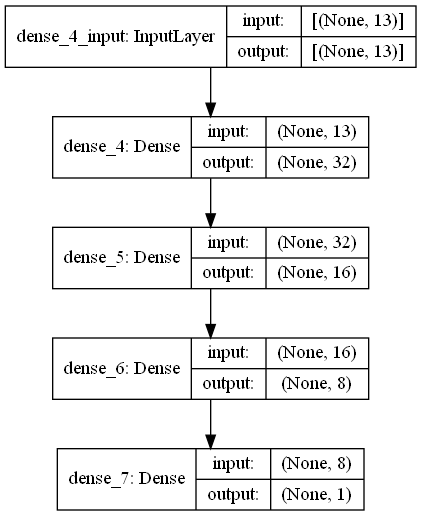

In [81]:
# 모델 구조를 그래프로 확인 >> grapgviz 설치가 되어 있어야 함
keras.utils.plot_model(model, show_shapes=True, to_file = 'housing.png') #파일경로(절대, 상대)를 지정, 생략시 model.png로 저장

#### 컴파일
 - 모델이 학습할 때 필요한 설정을 해주는 작업
 

In [82]:
# 회귀 - Loss : mean squared error - "mse"
model.compile(loss='mse',
              optimizer=keras.optimizers.Adam(learning_rate = LEARNING_RATE)) #optimizer를 문자열 지정 : 기본설정을 사용


#### 학습(train)

In [84]:
#batch_size 는 train_dataset생성시 batch를 지정했기 때문에 학습시 지정하지 않는다
hist = model.fit(train_dataset,
                 epochs = N_EPOCHS,
                 validation_data = test_dataset) #Dataset을 이용할 경우, validataion_split=비율 는 사용할 필요 x


Epoch 1/200
12/12 [==============================] - 1s 23ms/step - loss: 573.9138 - val_loss: 598.6295
Epoch 2/200
12/12 [==============================] - 0s 4ms/step - loss: 559.8445 - val_loss: 578.4251
Epoch 3/200
12/12 [==============================] - 0s 4ms/step - loss: 538.8327 - val_loss: 551.9249
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 513.8990 - val_loss: 516.7065
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 464.4741 - val_loss: 471.9203
Epoch 6/200
12/12 [==============================] - 0s 4ms/step - loss: 422.2019 - val_loss: 417.3783
Epoch 7/200
12/12 [==============================] - 0s 4ms/step - loss: 364.0688 - val_loss: 350.9067
Epoch 8/200
12/12 [==============================] - 0s 4ms/step - loss: 297.9700 - val_loss: 276.8508
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 223.9802 - val_loss: 201.6526
Epoch 10/200
12/12 [==============================] - 0s 3ms/step - loss

12/12 [==============================] - 0s 3ms/step - loss: 8.2750 - val_loss: 23.9662
Epoch 82/200
12/12 [==============================] - 0s 4ms/step - loss: 8.3393 - val_loss: 23.6360
Epoch 83/200
12/12 [==============================] - 0s 3ms/step - loss: 8.1612 - val_loss: 23.4314
Epoch 84/200
12/12 [==============================] - 0s 3ms/step - loss: 7.6961 - val_loss: 24.2199
Epoch 85/200
12/12 [==============================] - 0s 4ms/step - loss: 8.1631 - val_loss: 23.4614
Epoch 86/200
12/12 [==============================] - 0s 3ms/step - loss: 8.0778 - val_loss: 23.7805
Epoch 87/200
12/12 [==============================] - 0s 3ms/step - loss: 8.0187 - val_loss: 23.8761
Epoch 88/200
12/12 [==============================] - 0s 3ms/step - loss: 7.2070 - val_loss: 22.6163
Epoch 89/200
12/12 [==============================] - 0s 3ms/step - loss: 8.0658 - val_loss: 24.2829
Epoch 90/200
12/12 [==============================] - 0s 3ms/step - loss: 7.6281 - val_loss: 23.6449
Epo

12/12 [==============================] - 0s 2ms/step - loss: 5.0123 - val_loss: 20.2723
Epoch 162/200
12/12 [==============================] - 0s 3ms/step - loss: 5.0788 - val_loss: 19.8148
Epoch 163/200
12/12 [==============================] - 0s 2ms/step - loss: 5.0956 - val_loss: 20.2545
Epoch 164/200
12/12 [==============================] - 0s 4ms/step - loss: 4.9213 - val_loss: 20.0707
Epoch 165/200
12/12 [==============================] - 0s 3ms/step - loss: 4.8453 - val_loss: 19.3628
Epoch 166/200
12/12 [==============================] - 0s 3ms/step - loss: 4.9300 - val_loss: 19.4192
Epoch 167/200
12/12 [==============================] - 0s 2ms/step - loss: 4.9222 - val_loss: 20.0664
Epoch 168/200
12/12 [==============================] - 0s 2ms/step - loss: 4.8237 - val_loss: 19.6366
Epoch 169/200
12/12 [==============================] - 0s 4ms/step - loss: 4.9407 - val_loss: 19.5858
Epoch 170/200
12/12 [==============================] - 0s 3ms/step - loss: 4.8170 - val_loss: 19

In [85]:
train_y[0]

15.2

In [86]:
np.sqrt(17)

4.123105625617661

#### 결과 시각화

In [87]:
import matplotlib.pyplot as plt

In [88]:
print(type(hist.history))
hist.history.keys()

<class 'dict'>


dict_keys(['loss', 'val_loss'])

In [90]:
hist.history['loss']

[573.913818359375,
 559.844482421875,
 538.8327026367188,
 513.8989868164062,
 464.4740905761719,
 422.201904296875,
 364.0687561035156,
 297.97003173828125,
 223.98016357421875,
 157.50205993652344,
 106.52386474609375,
 78.864013671875,
 59.72021484375,
 49.21316909790039,
 38.0576057434082,
 33.68342971801758,
 29.929306030273438,
 27.636960983276367,
 25.679359436035156,
 24.295595169067383,
 22.87473487854004,
 22.255830764770508,
 19.807270050048828,
 20.550512313842773,
 19.605472564697266,
 19.400888442993164,
 18.621122360229492,
 17.582866668701172,
 17.632951736450195,
 16.893449783325195,
 14.399662017822266,
 15.886478424072266,
 15.526206016540527,
 13.065672874450684,
 13.484755516052246,
 14.29124927520752,
 13.598288536071777,
 12.263340950012207,
 12.12289810180664,
 13.12460708618164,
 12.83896255493164,
 12.650623321533203,
 12.091827392578125,
 11.914616584777832,
 11.553723335266113,
 11.694499969482422,
 11.323413848876953,
 11.052241325378418,
 11.18414211273193

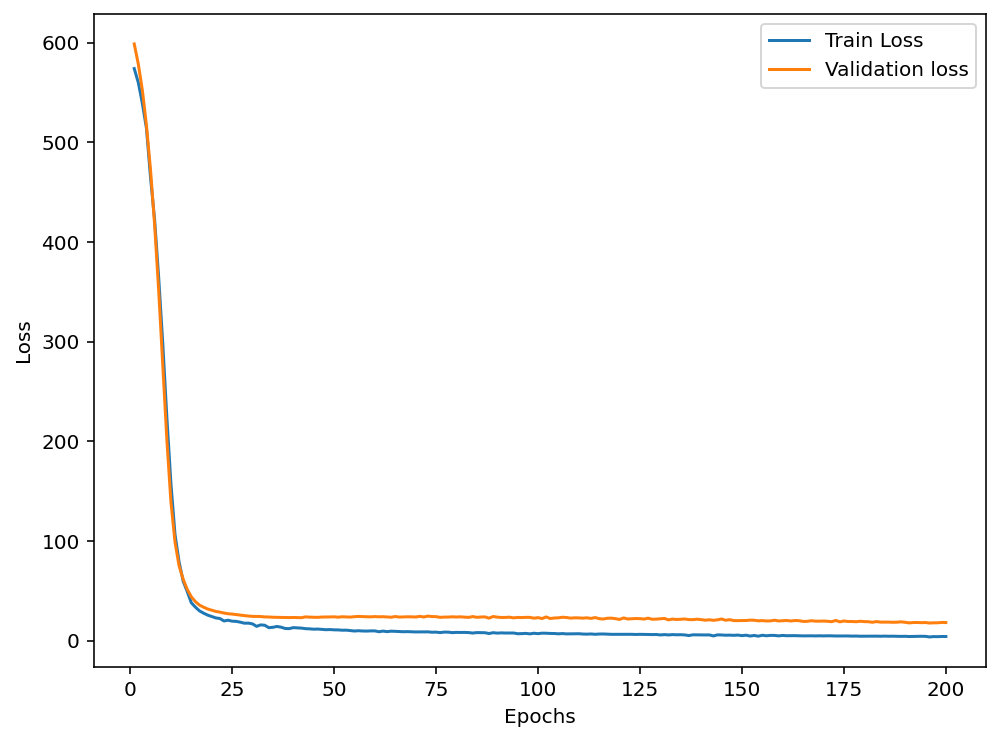

In [91]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

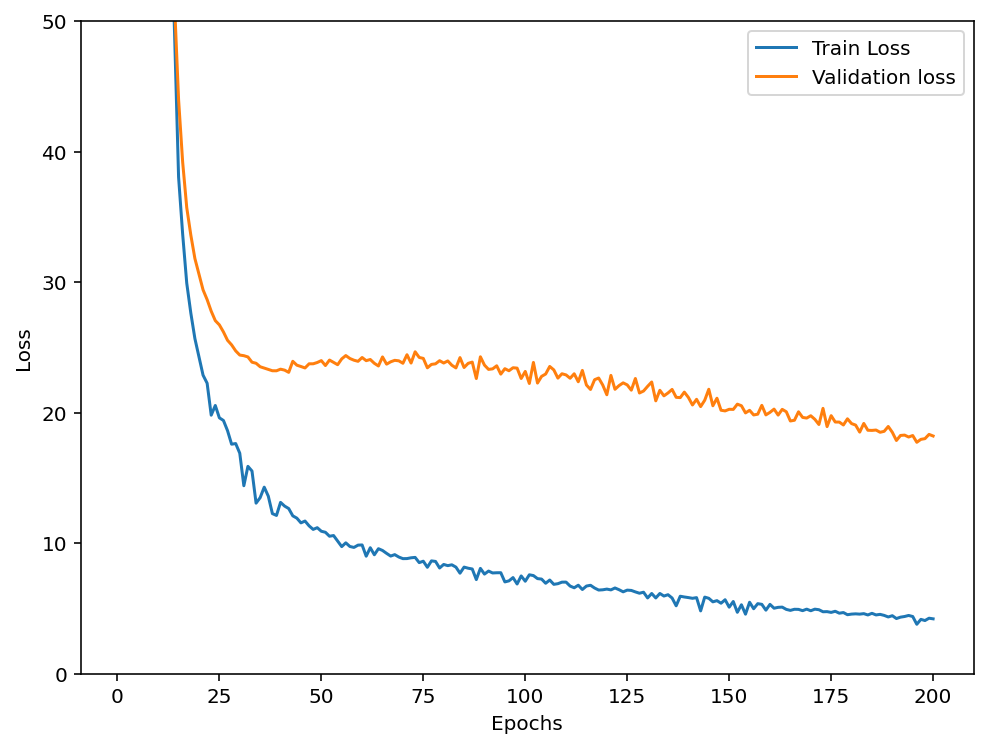

In [92]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,50)
plt.legend()
plt.show()

#### 최종 테스트

In [94]:
loss = model.evaluate(test_dataset)
print(loss, np.sqrt(loss))

4/4 [==============================] - 0s 2ms/step - loss: 18.2120
18.21198081970215 4.267549744256316


#### 추론

In [95]:
new_data = X_test[:5]
pred = model.predict(new_data)

In [97]:
X_test[0]

array([ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
        0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
        0.78447637, -3.48459553,  2.25092074])

In [96]:
pred

array([[ 9.207173],
       [18.673994],
       [22.247347],
       [36.083614],
       [25.442015]], dtype=float32)

In [98]:
test_y[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

## 2. Classification

### Fashion MNIST(MNIST) Dataset - 다중분류

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

패션 MNIST와 손글씨 MNIST는  비교적 작기 때문에 알고리즘의 작동 여부를 확인하기 위해 사용되곤 하며 코드를 테스트하고 디버깅하는 용도로 좋다.

이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)를 나낸다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [130]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

In [131]:
class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### 데이터 로딩

In [132]:
(train_image, train_label), (test_image, test_label) = keras.datasets.fashion_mnist.load_data()

In [133]:
#데이터들의 shape
print(train_image.shape, test_image.shape)
print(test_label.shape, test_label.shape)

(60000, 28, 28) (10000, 28, 28)
(10000,) (10000,)


In [134]:
#class별 데이터 개수
#train
print(np.unique(train_label, return_counts=True))

# test
print(np.unique(test_label, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


In [135]:
# validation set
from sklearn.model_selection import train_test_split
train_image, val_image, train_label, val_label = train_test_split(train_image, train_label, test_size = 0.2, stratify=train_label, random_state=0)


In [136]:
print(train_image.shape, val_image.shape)
np.unique(train_label, return_counts=True)

(48000, 28, 28) (12000, 28, 28)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800],
       dtype=int64))

In [137]:
# train_image, val_image, test_image : X
# train_label, val_label, test_label : y

#### 이미지 확인

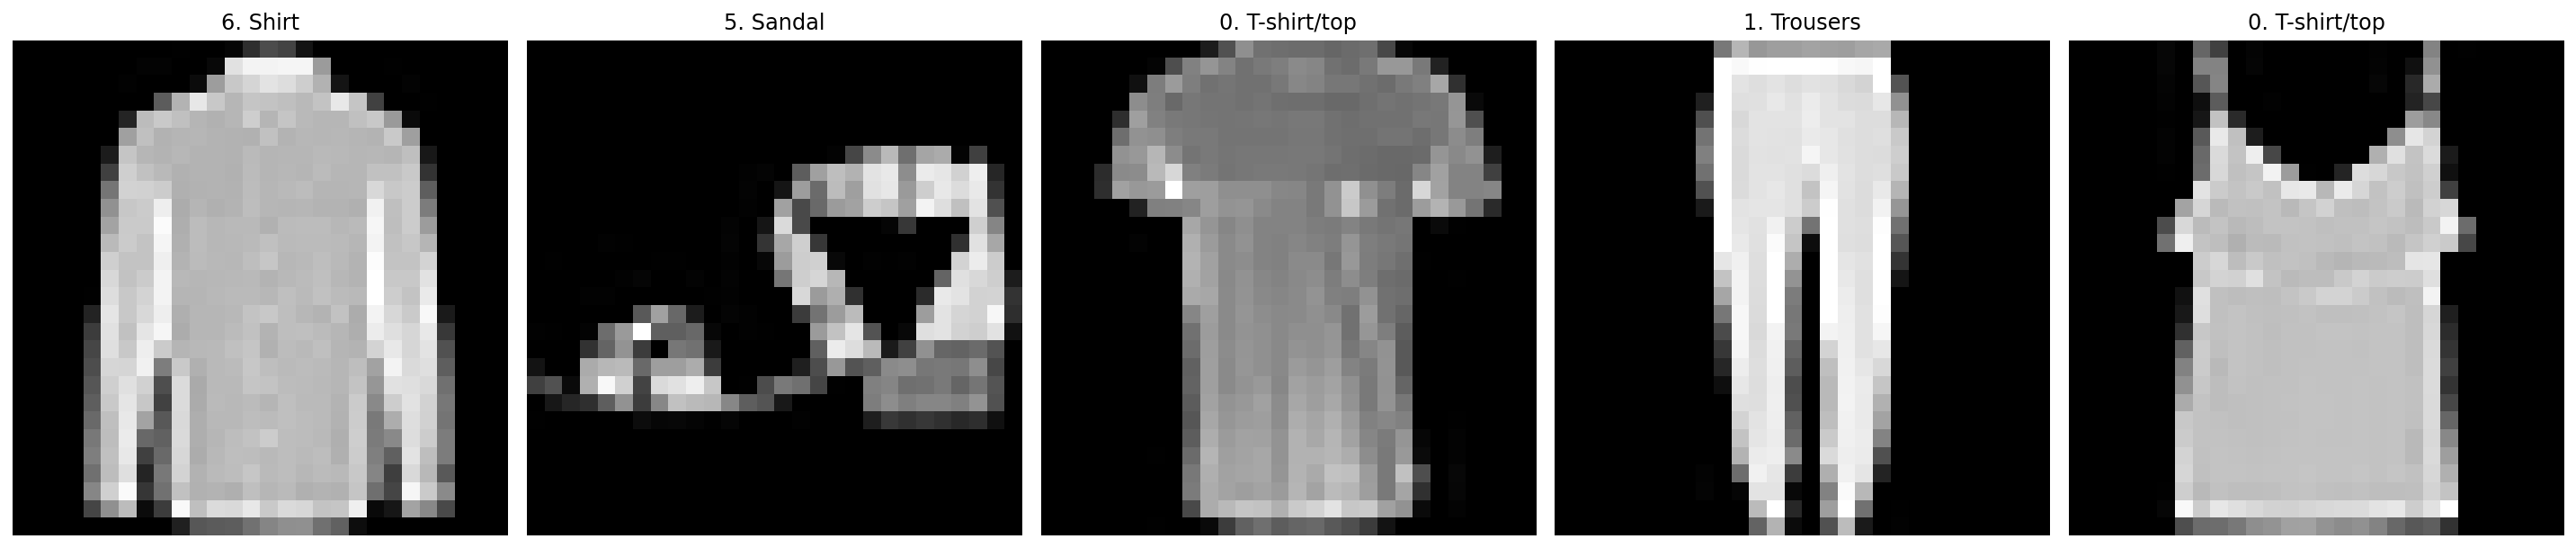

In [138]:
plt.figure(figsize=(20,7))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_image[i], cmap='gray')
    plt.title(f'{train_label[i]}. {class_names[train_label[i]]}')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

#### y값 처리
 - 다중 분류에서는 label encoding 형식의 label을 onehot encoding 처리

In [139]:
y_train = keras.utils.to_categorical(train_label)
y_val = keras.utils.to_categorical(val_label)
y_test = keras.utils.to_categorical(test_label)

print(y_train.shape, y_val.shape, y_test.shape)

(48000, 10) (12000, 10) (10000, 10)


In [140]:
y_train[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

 - x값(이미지) 처리
     - 이미지 데이터 전처리 : 0~1 정규화, X/255.0 >> Dataset 생성에서 처리

In [141]:
# X의 타입을 unit8 >> float32
X_train = train_image.astype(np.float32)
X_val = val_image.astype(np.float32)
X_test = test_image.astype(np.float32)

#X_train = (train_image/255.0).astype(np.float32)
#X_val = (val_image/255.0).astype(np.float32)
#X_test = (test_image/255.0).astype(np.float32)


#### 하이퍼 파라미터, 변수 설정

In [143]:
LEARNING_RATE = 0.001
N_EPOCHS = 100
N_BATCHS = 100

N_TRAIN = train_image.shape[0]
N_VAL = val_image.shape[0]
N_TEST = test_image.shape[0]

#### Dataset 생성
 - 데이터 입력 파이프라인

In [147]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .map(lambda x, y : (x/255, y)).shuffle(N_TRAIN)\
                               .batch(N_BATCHS, drop_remainder = True)
                            
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).map(lambda x, y : (x/255, y)).batch(N_BATCHS)
val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).map(lambda x, y : (x/255, y)).batch(N_BATCHS)

X_train.shape

(48000, 28, 28)

In [150]:
# 모델 생성 함수
def create_mnist_model():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(units=256, activation='relu'))
    model.add(layers.Dense(units=128, activation='relu'))
    model.add(layers.Dense(units=64, activation='relu'))
    
    #출력 데이터 : 다중분류 - unit개수 : class개수, activation함수 : softmax
    model.add(layers.Dense(units=10, activation='softmax'))
    
    return model

In [151]:
#모델 생성 및 컴파일
model = create_mnist_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate = LEARNING_RATE),
              loss = 'categorical_crossentropy', #다중분류 Loss : categorical_crossentropy
              metrics = ['accuracy']) #분류 : metrics(평가지표)로 accuracy를 추가

In [152]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


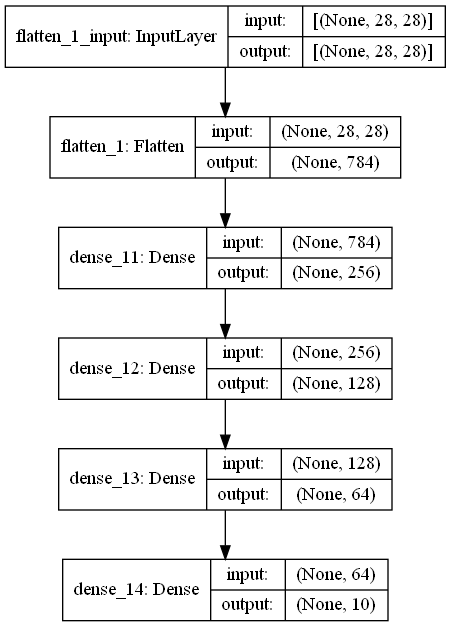

In [155]:
keras.utils.plot_model(model, show_shapes=True, to_file='fashion_mnist_model.png')

#### train

In [157]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data = val_dataset)

Epoch 1/100
480/480 [==============================] - 5s 7ms/step - loss: 0.5350 - accuracy: 0.8135 - val_loss: 0.4417 - val_accuracy: 0.8412
Epoch 2/100
480/480 [==============================] - 4s 6ms/step - loss: 0.3826 - accuracy: 0.8628 - val_loss: 0.4027 - val_accuracy: 0.8558
Epoch 3/100
480/480 [==============================] - 4s 6ms/step - loss: 0.3394 - accuracy: 0.8752 - val_loss: 0.3788 - val_accuracy: 0.8630
Epoch 4/100
480/480 [==============================] - 4s 6ms/step - loss: 0.3156 - accuracy: 0.8836 - val_loss: 0.3580 - val_accuracy: 0.8733
Epoch 5/100
480/480 [==============================] - 4s 5ms/step - loss: 0.2986 - accuracy: 0.8888 - val_loss: 0.3516 - val_accuracy: 0.8768
Epoch 6/100
480/480 [==============================] - 3s 5ms/step - loss: 0.2827 - accuracy: 0.8953 - val_loss: 0.3627 - val_accuracy: 0.8721
Epoch 7/100
480/480 [==============================] - 3s 5ms/step - loss: 0.2674 - accuracy: 0.8985 - val_loss: 0.3697 - val_accuracy: 0.8708

Epoch 58/100
480/480 [==============================] - 4s 5ms/step - loss: 0.0604 - accuracy: 0.9771 - val_loss: 0.6788 - val_accuracy: 0.8908
Epoch 59/100
480/480 [==============================] - 4s 6ms/step - loss: 0.0636 - accuracy: 0.9757 - val_loss: 0.6175 - val_accuracy: 0.8908
Epoch 60/100
480/480 [==============================] - 4s 6ms/step - loss: 0.0605 - accuracy: 0.9769 - val_loss: 0.6273 - val_accuracy: 0.8894
Epoch 61/100
480/480 [==============================] - 4s 5ms/step - loss: 0.0624 - accuracy: 0.9762 - val_loss: 0.6987 - val_accuracy: 0.8887
Epoch 62/100
480/480 [==============================] - 4s 6ms/step - loss: 0.0577 - accuracy: 0.9785 - val_loss: 0.6334 - val_accuracy: 0.8915
Epoch 63/100
480/480 [==============================] - 4s 6ms/step - loss: 0.0619 - accuracy: 0.9767 - val_loss: 0.6111 - val_accuracy: 0.8875
Epoch 64/100
480/480 [==============================] - 4s 5ms/step - loss: 0.0518 - accuracy: 0.9799 - val_loss: 0.6848 - val_accuracy:

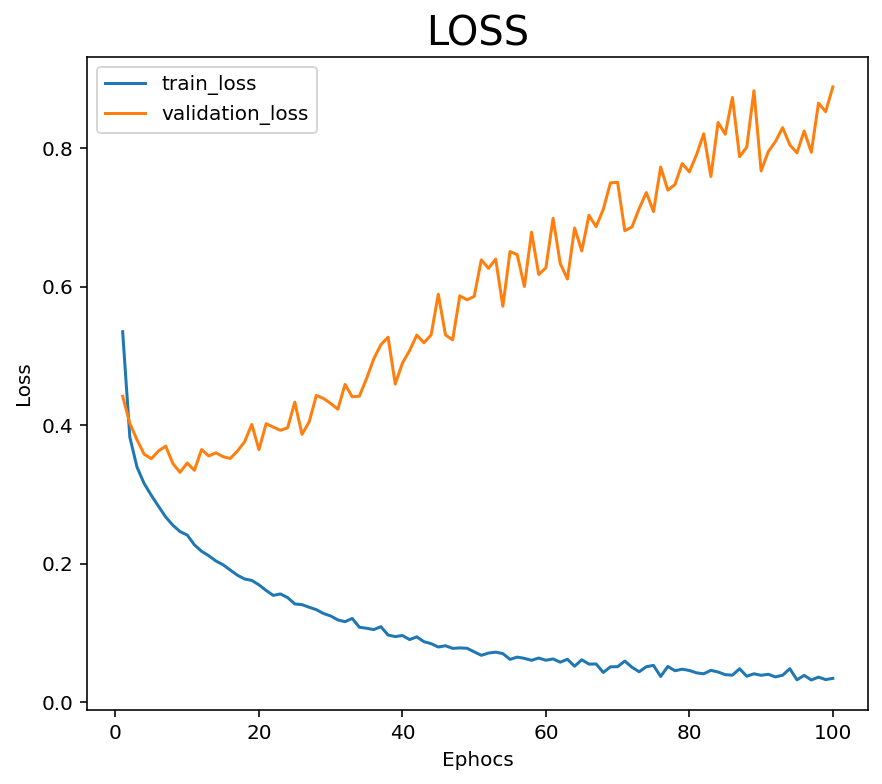

In [158]:
## loss가 낮은 것이 좋다!

plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['loss'], label='train_loss')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_loss'], label='validation_loss')
plt.title('LOSS', fontsize=20)
plt.xlabel('Ephocs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## val_loss가 가장 작아지는 epochs가 가장 좋다 대략 10 근처 어딘가

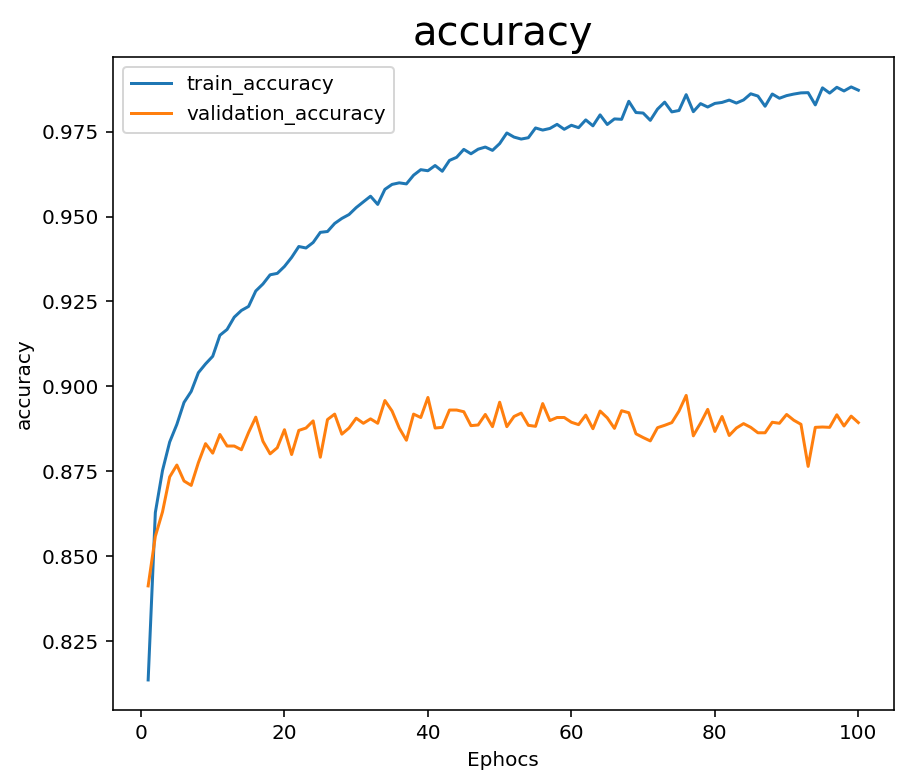

In [179]:
plt.figure(figsize=(7,6))
plt.plot(range(1, N_EPOCHS+1), hist.history['accuracy'], label='train_accuracy')
plt.plot(range(1, N_EPOCHS+1), hist.history['val_accuracy'], label='validation_accuracy')
plt.title('accuracy', fontsize=20)
plt.xlabel('Ephocs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


#### 최종 평가

In [180]:
loss, accuracy = model.evaluate(test_dataset)

ValueError: in user code:

    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1323 test_function  *
        return step_function(self, iterator)
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1307 run_step  **
        outputs = model.test_step(data)
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\training.py:1266 test_step
        y_pred = self(x, training=False)
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1030 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:380 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\functional.py:420 call
        return self._run_internal_graph(
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\functional.py:556 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_11 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 13)


In [181]:
print(loss, accuracy)

NameError: name 'accuracy' is not defined

In [182]:
#### 새로운 데이터 추론

In [183]:
new_input = X_test[:5]
new_input = new_input/255 #정규화

In [184]:
pred = model.predict(new_input)

In [185]:
pred_class = np.argmax(pred, axis=-1)
pred_class

array([9, 2, 1, 1, 6], dtype=int64)

In [186]:
class_names

array(['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'Sneaker', 'Bag', 'Ankle boot'], dtype='<U11')

In [187]:
class_names = np.array(class_names)
class_names[pred_class]

array(['Ankle boot', 'Pullover', 'Trousers', 'Trousers', 'Shirt'],
      dtype='<U11')

### 위스콘신 유방암 데이터셋 - 이진분류 문제
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [205]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [206]:
np.random.seed(0)
tf.random.set_seed(0)

In [207]:
X, y = load_breast_cancer(return_X_y = True)
X.shape, y.shape


((569, 30), (569,))

In [208]:
# test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
# train / val 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

In [209]:
X_train[:3]

array([[1.955e+01, 2.321e+01, 1.289e+02, 1.174e+03, 1.010e-01, 1.318e-01,
        1.856e-01, 1.021e-01, 1.989e-01, 5.884e-02, 6.107e-01, 2.836e+00,
        5.383e+00, 7.010e+01, 1.124e-02, 4.097e-02, 7.469e-02, 3.441e-02,
        2.768e-02, 6.240e-03, 2.082e+01, 3.044e+01, 1.420e+02, 1.313e+03,
        1.251e-01, 2.414e-01, 3.829e-01, 1.825e-01, 2.576e-01, 7.602e-02],
       [1.378e+01, 1.579e+01, 8.837e+01, 5.859e+02, 8.817e-02, 6.718e-02,
        1.055e-02, 9.937e-03, 1.405e-01, 5.848e-02, 3.563e-01, 4.833e-01,
        2.235e+00, 2.934e+01, 6.432e-03, 1.156e-02, 7.741e-03, 5.657e-03,
        1.227e-02, 2.564e-03, 1.527e+01, 1.750e+01, 9.790e+01, 7.066e+02,
        1.072e-01, 1.071e-01, 3.517e-02, 3.312e-02, 1.859e-01, 6.810e-02],
       [1.865e+01, 1.760e+01, 1.237e+02, 1.076e+03, 1.099e-01, 1.686e-01,
        1.974e-01, 1.009e-01, 1.907e-01, 6.049e-02, 6.289e-01, 6.633e-01,
        4.293e+00, 7.156e+01, 6.294e-03, 3.994e-02, 5.554e-02, 1.695e-02,
        2.428e-02, 3.535e-03, 2.282e

In [210]:
y_train[:3]

array([0, 1, 0])

#### 하이퍼 파라미터, 변수 정의

In [211]:
LEARNING_RATE = 0.001
N_EPOCHS = 150
N_BATCHS = 50

#각 데이터셋의 데이터 개수
N_TRAIN = X_train.shape[0] 
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

#### 데이터 전처리
 - 이진분류 
     - 출력 레이어의 unit을 1개, activation 함수를 sigmoid를 사용(1일 확률) >> y:그대로 사용
     - 출력 레이어의 unit을 1개, activation 함수를 softmax를 사용(0일 확률, 1일 확률) >> 다중분류와 동일하게 구현 >> y : onehotencoding
    
 - X : 테이블 데이터
     - 문자열(범주형) : onehot encoding
     - 연속형(수치형) : feature scaling

In [212]:
#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### dataset 생성

In [219]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

#### model 생성 및 컴파일

In [220]:
def create_cancer_model():
    model = keras.Sequential()
    #유방함 데이터는 1차원이어서 flatten 불필요
    model.add(layers.Dense(units=32, activation='relu', input_shape=(30,)))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    
    #출력 : 1일 확률 - unit:1, activation:sigmoid 
    model.add(layers.Dense(units=1, activation='sigmoid', name='ouput_layer'))
    
    return model

In [221]:
model = create_cancer_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
             loss='binary_crossentropy', #1일 확률 : binary_crossentropy (0일확률,1일확률) : categorical_crossentropy
             metrics=['accuracy']
             )

In [222]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 32)                992       
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 136       
_________________________________________________________________
ouput_layer (Dense)          (None, 1)                 9         
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


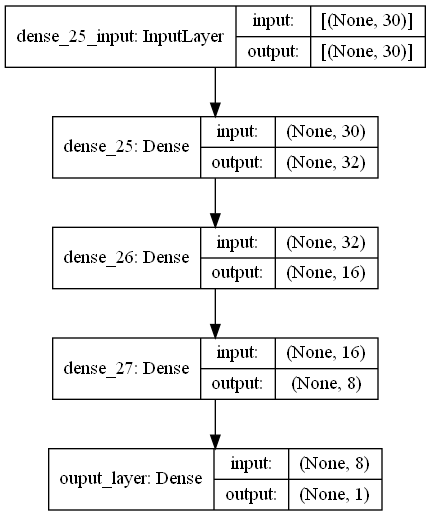

In [223]:
keras.utils.plot_model(model, show_shapes=True, to_file='breast_cancer_model.png')

#### 학습(train)

In [224]:
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)


Epoch 1/150
7/7 [==============================] - 1s 38ms/step - loss: 0.6923 - accuracy: 0.5143 - val_loss: 0.6596 - val_accuracy: 0.6593
Epoch 2/150
7/7 [==============================] - 0s 7ms/step - loss: 0.6397 - accuracy: 0.7000 - val_loss: 0.6057 - val_accuracy: 0.7802
Epoch 3/150
7/7 [==============================] - 0s 7ms/step - loss: 0.5874 - accuracy: 0.8714 - val_loss: 0.5463 - val_accuracy: 0.8901
Epoch 4/150
7/7 [==============================] - 0s 5ms/step - loss: 0.5249 - accuracy: 0.9257 - val_loss: 0.4798 - val_accuracy: 0.9341
Epoch 5/150
7/7 [==============================] - ETA: 0s - loss: 0.4837 - accuracy: 0.90 - 0s 9ms/step - loss: 0.4513 - accuracy: 0.9486 - val_loss: 0.4088 - val_accuracy: 0.9560
Epoch 6/150
7/7 [==============================] - 0s 15ms/step - loss: 0.3751 - accuracy: 0.9600 - val_loss: 0.3379 - val_accuracy: 0.9560
Epoch 7/150
7/7 [==============================] - 0s 5ms/step - loss: 0.3134 - accuracy: 0.9629 - val_loss: 0.2764 - val_

7/7 [==============================] - 0s 5ms/step - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0339 - val_accuracy: 0.9780
Epoch 60/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 0.9943 - val_loss: 0.0346 - val_accuracy: 0.9780
Epoch 61/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9943 - val_loss: 0.0355 - val_accuracy: 0.9780
Epoch 62/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 0.9971 - val_loss: 0.0366 - val_accuracy: 0.9780
Epoch 63/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.9971 - val_loss: 0.0372 - val_accuracy: 0.9780
Epoch 64/150
7/7 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9971 - val_loss: 0.0375 - val_accuracy: 0.9780
Epoch 65/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0162 - accuracy: 0.9971 - val_loss: 0.0382 - val_accuracy: 0.9780
Epoch 66/150
7/7 [===============

7/7 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9670
Epoch 118/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0437 - val_accuracy: 0.9670
Epoch 119/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 0.9670
Epoch 120/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0436 - val_accuracy: 0.9670
Epoch 121/150
7/7 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0434 - val_accuracy: 0.9780
Epoch 122/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 0.9780
Epoch 123/150
7/7 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0432 - val_accuracy: 0.9780
Epoch 124/150
7/7 [========

#### 결과 plotting

In [225]:
import matplotlib.pyplot as plt


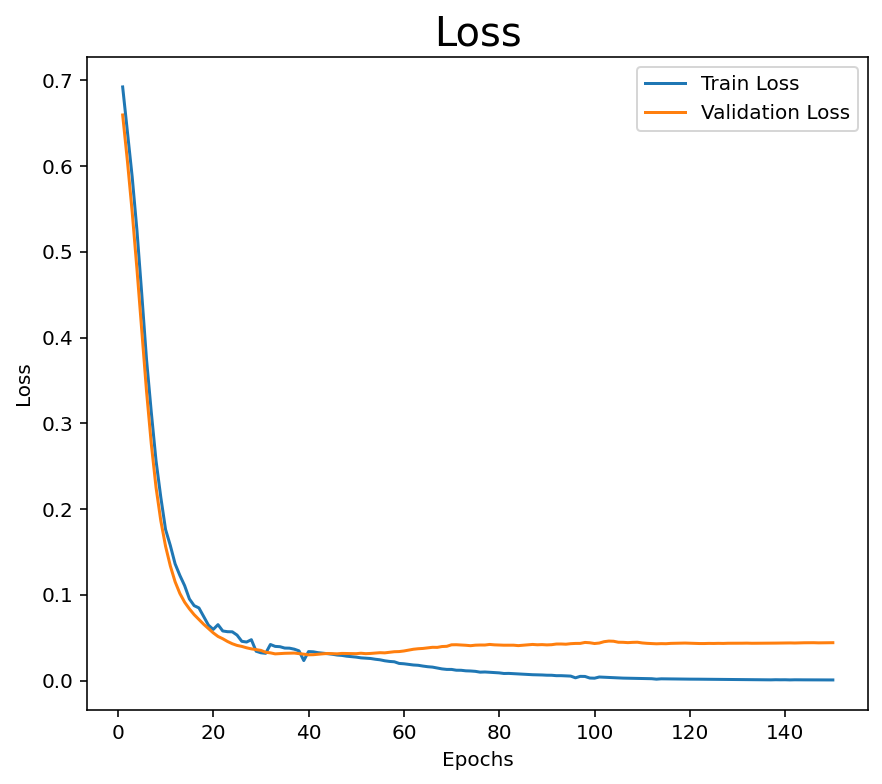

In [226]:
plt.figure(figsize=(7,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.title('Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

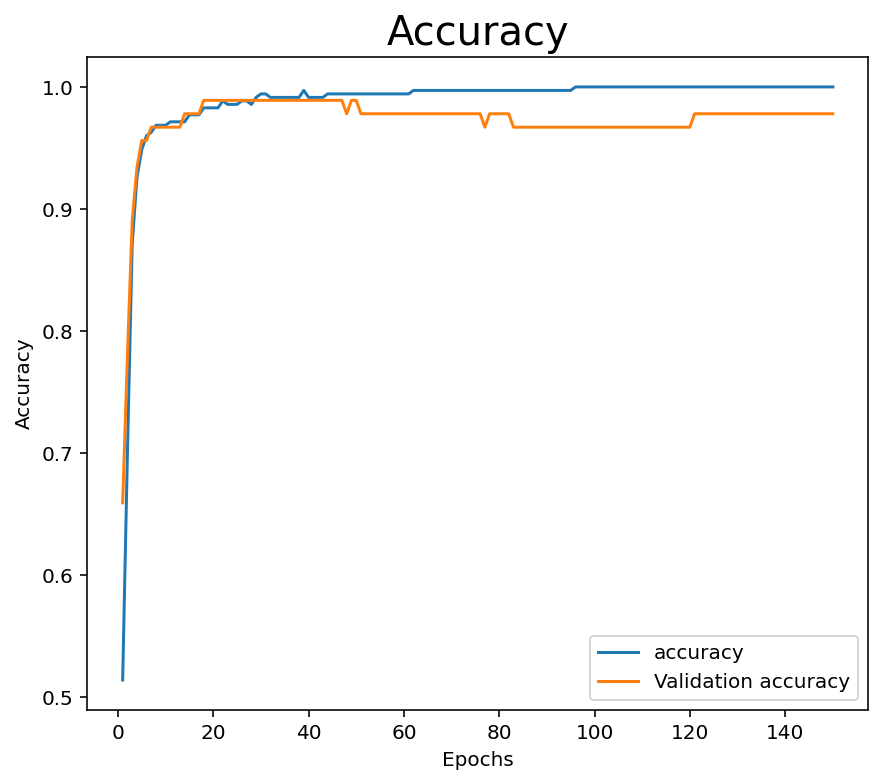

In [228]:
plt.figure(figsize=(7,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['accuracy'], label='accuracy')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 최종평가

In [229]:
loss, acc = model.evaluate(test_dataset)

3/3 [==============================] - 0s 3ms/step - loss: 0.1820 - accuracy: 0.9561


In [230]:
print(loss, acc)

0.18197780847549438 0.9561403393745422


#### 새로운 데이터 추론

In [231]:
new_data = X_test[:5]
new_data_scaled = scaler.transform(new_data)

pred = model.predict(new_data_scaled)
pred

array([[3.9028669e-06],
       [1.7599783e-27],
       [4.4942521e-09],
       [9.9998403e-01],
       [1.8385435e-09]], dtype=float32)

In [232]:
result = (pred > 0.5).astype(np.int8) #True:1, False:0
result

array([[0],
       [0],
       [0],
       [1],
       [0]], dtype=int8)

In [233]:
result_label = np.where(pred>=0.5, '양성','음성')
result_label

array([['음성'],
       ['음성'],
       ['음성'],
       ['양성'],
       ['음성']], dtype='<U2')

In [234]:
result2 = model.predict_classes(new_data_scaled)
result2

C:\Users\xodlr_000\anaconda3\envs\tf2\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [0],
       [0],
       [1],
       [0]])

### Tensorflow 2.3 이하 버전에서 Train dataset 구성 및 학습
 - 위의 코드들은 2.4 이후 버전
 
 1. train_dataset 구성시 repeat 추가
 2. 학습시에 train / validation step 횟수를 추가

In [235]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True).repeat()
val_dataset2 = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)
test_dataset2 = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS)

In [238]:
#학습시 train/validation 스텝 횟수 계산
steps_per_epoch = N_TRAIN // N_BATCHS #train시 한 에폭당 step 횟수 : Train데이터개수 / batch_size (drop_remainder=True인 경우)
validataion_steps = int(np.ceil(N_VAL / N_BATCHS))    #한 에폭에서 validation step 수.ceil(val데이터수 / batch_size) - drop_remainder=False인 경우

In [239]:
print(steps_per_epoch, validataion_steps)

7 2


In [242]:
model.fit(train_dataset2, steps_per_epoch=steps_per_epoch, validation_data = val_dataset2,
         validation_steps = validataion_steps, epochs=2)

Epoch 1/2
7/7 [==============================] - 0s 6ms/step - loss: 7.6108e-04 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9780
Epoch 2/2
7/7 [==============================] - 0s 7ms/step - loss: 7.4120e-04 - accuracy: 1.0000 - val_loss: 0.0443 - val_accuracy: 0.9780
